In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import math
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import mean_squared_error


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:

# Read the dataset into a Pandas DataFrame

df = pd.read_csv('/content/drive/MyDrive/Nasdaq.csv')

# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'].str[:10])

df


,Date,Open,High,Low,Close,Volume
0,2001-01-02,2474.159912,2474.159912,2273.070068,2291.860107,1918930000
1,2001-01-03,2254.560059,2618.030029,2251.709961,2616.689941,3188000000
2,2001-01-04,2593.959961,2644.800049,2549.830078,2566.830078,2610680000
3,2001-01-05,2573.110107,2574.620117,2395.389893,2407.649902,2104670000
4,2001-01-06,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...
8481,2024-03-23,NaN,NaN,NaN,NaN,0
8482,2024-03-24,NaN,NaN,NaN,NaN,0
8483,2024-03-25,16335.299805,16441.169922,16315.719727,16384.470703,4636940000
8484,2024-03-26,16446.849609,16476.380859,16312.950195,16315.700195,5144260000


In [4]:

df['Date'] = pd.to_datetime(df['Date'])

# Filter rows where 'Open' column is not NaN
df = df[df['Open'].notna()]

# Reset index
df.reset_index(drop=True, inplace=True)

# Display the modified DataFrame
df



,Date,Open,High,Low,Close,Volume
0,2001-01-02,2474.159912,2474.159912,2273.070068,2291.860107,1918930000
1,2001-01-03,2254.560059,2618.030029,2251.709961,2616.689941,3188000000
2,2001-01-04,2593.959961,2644.800049,2549.830078,2566.830078,2610680000
3,2001-01-05,2573.110107,2574.620117,2395.389893,2407.649902,2104670000
4,2001-01-08,2388.719971,2397.060059,2299.649902,2395.919922,1850590000
...,...,...,...,...,...,...
5840,2024-03-21,16517.240234,16538.859375,16393.900391,16401.839844,5134740000
5841,2024-03-22,16387.830078,16467.619141,16361.000000,16428.820312,4339930000
5842,2024-03-25,16335.299805,16441.169922,16315.719727,16384.470703,4636940000
5843,2024-03-26,16446.849609,16476.380859,16312.950195,16315.700195,5144260000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5845 entries, 0 to 5844
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5845 non-null   datetime64[ns]
 1   Open    5845 non-null   float64       
 2   High    5845 non-null   float64       
 3   Low     5845 non-null   float64       
 4   Close   5845 non-null   float64       
 5   Volume  5845 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 274.1 KB


In [6]:
df.shape


(5845, 6)

In [7]:
# Setting the layout for our plot
layout = go.Layout(
    title='Stock Prices of DowJones',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

plot_data = [{'x':df['Date'], 'y':df['Close']}]
plot = go.Figure(data=plot_data, layout=layout)


iplot(plot)

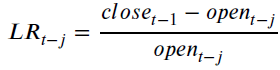

Where,
       


*   t is the orbservation at time 't'
*   𝑗 ∈ {1, 2, 3, 4, 5, 21, 63, 126, 252}
*   LR is the Lagged Returns



In [8]:
def calculate_lagged_returns(df, window_sizes):
    for window_size in window_sizes:

        lagged_returns = (df['Close'].shift(1) - df['Open'].shift(window_size)) / df['Open'].shift(window_size)
        lagged_returns_name = f'LR_{window_size}'
        df[lagged_returns_name] = lagged_returns
    return df


window_sizes = [1, 2, 3, 4, 5, 21, 63, 126, 252]

df_with_lagged_returns = calculate_lagged_returns(df, window_sizes)

df_with_lagged_returns


<ipython-input-8-1c7c2211b511>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-1c7c2211b511>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-1c7c2211b511>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-1c7c2211b51

,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252
0,2001-01-02,2474.159912,2474.159912,2273.070068,2291.860107,1918930000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001-01-03,2254.560059,2618.030029,2251.709961,2616.689941,3188000000,-0.073681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2001-01-04,2593.959961,2644.800049,2549.830078,2566.830078,2610680000,0.160621,0.057607,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2001-01-05,2573.110107,2574.620117,2395.389893,2407.649902,2104670000,-0.010459,0.138506,0.037455,NaN,NaN,NaN,NaN,NaN,NaN
4,2001-01-08,2388.719971,2397.060059,2299.649902,2395.919922,1850590000,-0.064304,-0.071825,0.067902,-0.026882,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5840,2024-03-21,16517.240234,16538.859375,16393.900391,16401.839844,5134740000,0.011346,0.021051,0.013277,0.020309,0.009884,0.053907,0.096923,0.193953,0.391390
5841,2024-03-22,16387.830078,16467.619141,16361.000000,16428.820312,4339930000,-0.006987,0.013350,0.023073,0.015285,0.022330,0.031272,0.095401,0.230625,0.383246
5842,2024-03-25,16335.299805,16441.169922,16315.719727,16384.470703,4636940000,0.002501,-0.005353,0.015017,0.024756,0.016955,0.020753,0.100896,0.236442,0.390939
5843,2024-03-26,16446.849609,16476.380859,16312.950195,16315.700195,5144260000,0.003010,-0.000205,-0.008038,0.012277,0.021990,0.023105,0.091848,0.243835,0.394706


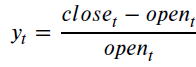

Where,
       


*   t is the orbservation at time 't'
*   y is the Target_variable



In [9]:
# Add the target variable column to the DataFrame

df_with_target_variable = df_with_lagged_returns.copy()
df_with_target_variable['Target_variable'] = (df_with_target_variable['Close'] - df_with_target_variable['Open']) / df_with_target_variable['Open']
df_with_target_variable


,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable
0,2001-01-02,2474.159912,2474.159912,2273.070068,2291.860107,1918930000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.073681
1,2001-01-03,2254.560059,2618.030029,2251.709961,2616.689941,3188000000,-0.073681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.160621
2,2001-01-04,2593.959961,2644.800049,2549.830078,2566.830078,2610680000,0.160621,0.057607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.010459
3,2001-01-05,2573.110107,2574.620117,2395.389893,2407.649902,2104670000,-0.010459,0.138506,0.037455,NaN,NaN,NaN,NaN,NaN,NaN,-0.064304
4,2001-01-08,2388.719971,2397.060059,2299.649902,2395.919922,1850590000,-0.064304,-0.071825,0.067902,-0.026882,NaN,NaN,NaN,NaN,NaN,0.003014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5840,2024-03-21,16517.240234,16538.859375,16393.900391,16401.839844,5134740000,0.011346,0.021051,0.013277,0.020309,0.009884,0.053907,0.096923,0.193953,0.391390,-0.006987
5841,2024-03-22,16387.830078,16467.619141,16361.000000,16428.820312,4339930000,-0.006987,0.013350,0.023073,0.015285,0.022330,0.031272,0.095401,0.230625,0.383246,0.002501
5842,2024-03-25,16335.299805,16441.169922,16315.719727,16384.470703,4636940000,0.002501,-0.005353,0.015017,0.024756,0.016955,0.020753,0.100896,0.236442,0.390939,0.003010
5843,2024-03-26,16446.849609,16476.380859,16312.950195,16315.700195,5144260000,0.003010,-0.000205,-0.008038,0.012277,0.021990,0.023105,0.091848,0.243835,0.394706,-0.007974


In [10]:
df = df_with_target_variable.dropna()
df

,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable
252,2002-01-08,2039.420044,2060.229980,2027.339966,2055.739990,1873670000,-0.018379,-0.011994,0.025183,0.036597,0.026604,-0.003970,0.286917,-0.046792,-0.176650,0.008002
253,2002-01-09,2074.320068,2098.879883,2034.089966,2044.890015,2321450000,0.008002,-0.009397,-0.002954,0.034564,0.046082,0.005901,0.281546,-0.031631,-0.088186,-0.014188
254,2002-01-10,2045.130005,2055.889893,2026.050049,2047.239990,1761640000,-0.014188,0.002682,-0.014625,-0.008216,0.029103,0.018539,0.307508,-0.007687,-0.211672,0.001032
255,2002-01-11,2049.500000,2058.770020,2018.680054,2022.459961,1625530000,0.001032,-0.013055,0.003834,-0.013492,-0.007076,0.018563,0.241090,0.018036,-0.204371,-0.013193
256,2002-01-14,2012.589966,2018.420044,1979.939941,1990.739990,1801650000,-0.013193,-0.011085,-0.025001,-0.008316,-0.025433,0.007462,0.196573,-0.010349,-0.153329,-0.010857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5840,2024-03-21,16517.240234,16538.859375,16393.900391,16401.839844,5134740000,0.011346,0.021051,0.013277,0.020309,0.009884,0.053907,0.096923,0.193953,0.391390,-0.006987
5841,2024-03-22,16387.830078,16467.619141,16361.000000,16428.820312,4339930000,-0.006987,0.013350,0.023073,0.015285,0.022330,0.031272,0.095401,0.230625,0.383246,0.002501
5842,2024-03-25,16335.299805,16441.169922,16315.719727,16384.470703,4636940000,0.002501,-0.005353,0.015017,0.024756,0.016955,0.020753,0.100896,0.236442,0.390939,0.003010
5843,2024-03-26,16446.849609,16476.380859,16312.950195,16315.700195,5144260000,0.003010,-0.000205,-0.008038,0.012277,0.021990,0.023105,0.091848,0.243835,0.394706,-0.007974


In [11]:
# Calculate the lengths for train, validation, and test sets
total_length = len(df)
train_length = int(total_length * 0.7)
validation_length = int(total_length * 0.15)

# Split the data into training, validation, and test sets
train_set = df.iloc[:train_length]
validation_set = df.iloc[train_length:train_length+validation_length]
test_set = df.iloc[train_length+validation_length:]

x_train = train_set.iloc[:, 6:-1].values
y_train = train_set.iloc[:, -1].values

x_valid = validation_set.iloc[:, 6:-1].values
y_valid = validation_set.iloc[:, -1].values

x_test = test_set.iloc[:, 6:-1].values
y_test = test_set.iloc[:, -1].values



In [12]:
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)
print("x_valid: ",x_valid.shape)
print("y_valid: ",y_valid.shape)
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)


x_train:  (3915, 9)
y_train:  (3915,)
x_valid:  (838, 9)
y_valid:  (838,)
x_test:  (840, 9)
y_test:  (840,)


In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


# Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001,0.0001],
    'epsilon': [0.1, 0.01, 0.001,0.0001]
}

# Create SVR model
svr = SVR(kernel='rbf')

# Perform grid search with cross-validation
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'epsilon': [0.1, 0.01, 0.001, 0.0001],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]},
             scoring='neg_mean_squared_error', verbose=2)

In [14]:
best_svr = grid_search.best_estimator_

In [15]:
# Print the best hyperparameters found from grid search

print("Best hyperparameters found from grid search:")
print(grid_search.best_params_)

Best hyperparameters found from grid search:
{'C': 0.1, 'epsilon': 0.001, 'gamma': 0.001}


In [16]:
best_model_path = "best_svr_model.pkl"
joblib.dump((best_svr, grid_search.best_params_), best_model_path)

drive.mount('/content/drive')

drive_path = "/content/drive/MyDrive/"

!cp best_svr_model.pkl "{drive_path}"

print(f"Model saved in Google Drive: {drive_path}best_svr_model.pkl")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model saved in Google Drive: /content/drive/MyDrive/best_svr_model.pkl


In [17]:
# Load best model and its hyperparameters
drive_path = "/content/drive/MyDrive/"

loaded_model_path = drive_path + "best_svr_model.pkl"
best_svr, best_hyperparameters_svr = joblib.load(loaded_model_path)
print("model loaded and stored in variable 'best_svr'")

print("Loaded hyperparameters:")
print(best_hyperparameters_svr)



model loaded and stored in variable 'best_svr'
Loaded hyperparameters:
{'C': 0.1, 'epsilon': 0.001, 'gamma': 0.001}


In [18]:
# Make predictions
y_train_pred = best_svr.predict(x_train)
y_valid_pred = best_svr.predict(x_valid)
y_test_pred = best_svr.predict(x_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
valid_rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))


In [20]:
print("Train RMSE (SVR): ",train_rmse)
print("Validation RMSE (SVR): ",valid_rmse)
print("Test RMSE (SVR): ",test_rmse)


Train RMSE (SVR):  0.01147543610073983
Validation RMSE (SVR):  0.010942481365446413
Test RMSE (SVR):  0.011892219520930704


In [21]:
# Add the predicted target variable to the validation set with the new column name

validation_set['Target_prediction'] = y_valid_pred
validation_set


<ipython-input-21-59e6355016a7>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable,Target_prediction
4167,2017-07-27,6459.759766,6460.839844,6318.620117,6382.189941,2501400000,-0.000495,0.002366,0.005468,0.006220,0.004110,0.031287,0.063639,0.133504,0.248629,-0.012008,0.000315
4168,2017-07-28,6350.270020,6379.700195,6337.220215,6374.680176,1877100000,-0.012008,-0.006807,-0.003964,-0.000881,-0.000135,0.033871,0.050935,0.126624,0.240508,0.003844,0.000327
4169,2017-07-31,6394.689941,6396.589844,6338.790039,6348.120117,1898830000,0.003844,-0.013171,-0.007975,-0.005136,-0.002057,0.025612,0.050617,0.131093,0.234889,-0.007283,0.000327
4170,2017-08-01,6372.160156,6375.750000,6345.750000,6362.939941,1821780000,-0.007283,-0.000339,-0.017282,-0.012109,-0.009281,0.029396,0.040247,0.135038,0.228489,-0.001447,0.000334
4171,2017-08-02,6393.100098,6394.209961,6313.430176,6362.649902,2115870000,-0.001447,-0.004965,0.001995,-0.014988,-0.009803,0.030721,0.047391,0.125286,0.228953,-0.004763,0.000333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5000,2020-11-16,11847.110352,11937.719727,11814.889648,11924.129883,4172570000,0.002912,0.002270,0.014810,0.017797,-0.018044,0.005735,0.058952,0.281966,0.387685,0.006501,0.000223
5001,2020-11-17,11913.349609,11950.179688,11852.410156,11899.339844,4145030000,0.006501,0.010953,0.010305,0.022947,0.025957,0.016347,0.063249,0.281390,0.398043,-0.001176,0.000214
5002,2020-11-18,11896.059570,11942.490234,11799.959961,11801.599609,4731420000,-0.001176,0.004409,0.008851,0.008205,0.020820,0.031869,0.072360,0.269237,0.387190,-0.007940,0.000222
5003,2020-11-19,11779.040039,11912.629883,11760.980469,11904.709961,5385190000,-0.007940,-0.009380,-0.003842,0.000565,-0.000076,0.023521,0.048245,0.271923,0.381343,0.010669,0.000233


In [22]:
# Add a new column 'Predicted_close' to validation_set

validation_set['Predicted_close'] = (validation_set['Target_prediction'] * validation_set['Open']) + validation_set['Open']
validation_set


<ipython-input-22-e78b35780010>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable,Target_prediction,Predicted_close
4167,2017-07-27,6459.759766,6460.839844,6318.620117,6382.189941,2501400000,-0.000495,0.002366,0.005468,0.006220,0.004110,0.031287,0.063639,0.133504,0.248629,-0.012008,0.000315,6461.797748
4168,2017-07-28,6350.270020,6379.700195,6337.220215,6374.680176,1877100000,-0.012008,-0.006807,-0.003964,-0.000881,-0.000135,0.033871,0.050935,0.126624,0.240508,0.003844,0.000327,6352.343550
4169,2017-07-31,6394.689941,6396.589844,6338.790039,6348.120117,1898830000,0.003844,-0.013171,-0.007975,-0.005136,-0.002057,0.025612,0.050617,0.131093,0.234889,-0.007283,0.000327,6396.779983
4170,2017-08-01,6372.160156,6375.750000,6345.750000,6362.939941,1821780000,-0.007283,-0.000339,-0.017282,-0.012109,-0.009281,0.029396,0.040247,0.135038,0.228489,-0.001447,0.000334,6374.286008
4171,2017-08-02,6393.100098,6394.209961,6313.430176,6362.649902,2115870000,-0.001447,-0.004965,0.001995,-0.014988,-0.009803,0.030721,0.047391,0.125286,0.228953,-0.004763,0.000333,6395.226926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5000,2020-11-16,11847.110352,11937.719727,11814.889648,11924.129883,4172570000,0.002912,0.002270,0.014810,0.017797,-0.018044,0.005735,0.058952,0.281966,0.387685,0.006501,0.000223,11849.747654
5001,2020-11-17,11913.349609,11950.179688,11852.410156,11899.339844,4145030000,0.006501,0.010953,0.010305,0.022947,0.025957,0.016347,0.063249,0.281390,0.398043,-0.001176,0.000214,11915.894608
5002,2020-11-18,11896.059570,11942.490234,11799.959961,11801.599609,4731420000,-0.001176,0.004409,0.008851,0.008205,0.020820,0.031869,0.072360,0.269237,0.387190,-0.007940,0.000222,11898.695359
5003,2020-11-19,11779.040039,11912.629883,11760.980469,11904.709961,5385190000,-0.007940,-0.009380,-0.003842,0.000565,-0.000076,0.023521,0.048245,0.271923,0.381343,0.010669,0.000233,11781.782500


In [25]:
import eli5
from eli5.sklearn import PermutationImportance



perm = PermutationImportance(best_svr, random_state=1)
perm.fit(x_valid, y_valid)
eli5.show_weights(perm, feature_names=['LR_1', 'LR_2', 'LR_3', 'LR_4', 'LR_5', 'LR_21', 'LR_63', 'LR_126', 'LR_252'])


Weight,Feature
0.0006 ± 0.0007,LR_252
0.0002 ± 0.0003,LR_63
0.0002 ± 0.0001,LR_126
0.0001 ± 0.0000,LR_2
0.0000 ± 0.0000,LR_1
0.0000 ± 0.0000,LR_5
-0.0000 ± 0.0000,LR_4
-0.0000 ± 0.0000,LR_3
-0.0001 ± 0.0001,LR_21


In [24]:
pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=a88fe10348d93b25dd7baf73b15197143eaac9328edb74b3ef6210082ffc844e
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [26]:
weights = perm.feature_importances_
feature_names = ['LR_1', 'LR_2', 'LR_3', 'LR_4', 'LR_5', 'LR_21', 'LR_63', 'LR_126', 'LR_252']

feature_weights = list(zip(feature_names, weights))

sorted_features = sorted(feature_weights, key=lambda x: x[1], reverse=True)

sorted_feature_names = [feature[0] for feature in sorted_features]

print("Ranked Features based on Permutation Importance:")
print(sorted_feature_names)


Ranked Features based on Permutation Importance:
['LR_252', 'LR_63', 'LR_126', 'LR_2', 'LR_1', 'LR_5', 'LR_4', 'LR_3', 'LR_21']


In [28]:
validation_set_pi=validation_set.copy()
features_to_drop = ['Target_prediction','Predicted_close']
validation_set_pi.drop(features_to_drop, axis=1, inplace=True)

validation_set_pi


,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable
4167,2017-07-27,6459.759766,6460.839844,6318.620117,6382.189941,2501400000,-0.000495,0.002366,0.005468,0.006220,0.004110,0.031287,0.063639,0.133504,0.248629,-0.012008
4168,2017-07-28,6350.270020,6379.700195,6337.220215,6374.680176,1877100000,-0.012008,-0.006807,-0.003964,-0.000881,-0.000135,0.033871,0.050935,0.126624,0.240508,0.003844
4169,2017-07-31,6394.689941,6396.589844,6338.790039,6348.120117,1898830000,0.003844,-0.013171,-0.007975,-0.005136,-0.002057,0.025612,0.050617,0.131093,0.234889,-0.007283
4170,2017-08-01,6372.160156,6375.750000,6345.750000,6362.939941,1821780000,-0.007283,-0.000339,-0.017282,-0.012109,-0.009281,0.029396,0.040247,0.135038,0.228489,-0.001447
4171,2017-08-02,6393.100098,6394.209961,6313.430176,6362.649902,2115870000,-0.001447,-0.004965,0.001995,-0.014988,-0.009803,0.030721,0.047391,0.125286,0.228953,-0.004763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5000,2020-11-16,11847.110352,11937.719727,11814.889648,11924.129883,4172570000,0.002912,0.002270,0.014810,0.017797,-0.018044,0.005735,0.058952,0.281966,0.387685,0.006501
5001,2020-11-17,11913.349609,11950.179688,11852.410156,11899.339844,4145030000,0.006501,0.010953,0.010305,0.022947,0.025957,0.016347,0.063249,0.281390,0.398043,-0.001176
5002,2020-11-18,11896.059570,11942.490234,11799.959961,11801.599609,4731420000,-0.001176,0.004409,0.008851,0.008205,0.020820,0.031869,0.072360,0.269237,0.387190,-0.007940
5003,2020-11-19,11779.040039,11912.629883,11760.980469,11904.709961,5385190000,-0.007940,-0.009380,-0.003842,0.000565,-0.000076,0.023521,0.048245,0.271923,0.381343,0.010669


In [29]:
x_valid_pi = validation_set_pi.iloc[:, 6:-1].values
y_valid_pi = validation_set_pi.iloc[:, -1].values

In [30]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


# Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001,0.0001],
    'epsilon': [0.1, 0.01, 0.001,0.0001]
}

# Create SVR model
svr = SVR(kernel='rbf')

# Perform grid search with cross-validation
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(x_valid_pi, y_valid_pi)


Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'epsilon': [0.1, 0.01, 0.001, 0.0001],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]},
             scoring='neg_mean_squared_error', verbose=2)

In [31]:
# Get the best model from grid search
best_svr_pi = grid_search.best_estimator_


In [32]:
y_valid_pred_pi = best_svr_pi.predict(x_valid_pi)

valid_rmse_pi = np.sqrt(mean_squared_error(y_valid_pi, y_valid_pred_pi))

print("Validation RMSE:", valid_rmse_pi)


Validation RMSE: 0.010668280913656457


In [33]:
loss_difference=valid_rmse-valid_rmse_pi
loss_difference

0.0002742004517899566

In [34]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

validation_set_pi = validation_set.copy()
validation_set_pi.drop(['Target_prediction', 'Predicted_close'], axis=1, inplace=True)


rmse_dict = {}
features_dropped = []

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001, 0.0001],
    'epsilon': [0.1, 0.01, 0.001, 0.0001]
}

svr = SVR(kernel='rbf')

for feature in sorted_feature_names[::-1]:

    validation_set_pi.drop([feature], axis=1, inplace=True)

    x_valid_pi = validation_set_pi.iloc[:, 6:-1].values
    y_valid_pi = validation_set_pi.iloc[:, -1].values

    if x_valid_pi.shape[1] > 0:
        grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
        grid_search.fit(x_valid_pi, y_valid_pi)

        best_svr_pi = grid_search.best_estimator_

        y_valid_pred_pi = best_svr_pi.predict(x_valid_pi)

        valid_rmse_pi = np.sqrt(mean_squared_error(y_valid_pi, y_valid_pred_pi))

        feature_names = validation_set_pi.columns[6:-1].tolist()

        rmse_dict[tuple(feature_names)] = valid_rmse_pi

        features_dropped.append(feature)

    else:
        print("No features left to drop. Exiting loop.")
        break

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
No features left to drop. Exiting loop.


In [35]:
print(rmse_dict)

{('LR_1', 'LR_2', 'LR_3', 'LR_4', 'LR_5', 'LR_63', 'LR_126', 'LR_252'): 0.01061713031946649, ('LR_1', 'LR_2', 'LR_4', 'LR_5', 'LR_63', 'LR_126', 'LR_252'): 0.01067238518382684, ('LR_1', 'LR_2', 'LR_5', 'LR_63', 'LR_126', 'LR_252'): 0.010680260692215872, ('LR_1', 'LR_2', 'LR_63', 'LR_126', 'LR_252'): 0.01069460210617116, ('LR_2', 'LR_63', 'LR_126', 'LR_252'): 0.010721877658435157, ('LR_63', 'LR_126', 'LR_252'): 0.010908369403827337, ('LR_63', 'LR_252'): 0.010927239576206211, ('LR_252',): 0.010923911235352624}


In [36]:
# Convert rmse_dict keys to a list of tuples
feature_combinations = list(rmse_dict.keys())

# Initialize a new dictionary to store the loss differences
rmse_loss_dict = {}

# Iterate over the indices of feature_combinations
for i in range(len(feature_combinations)):
    # Calculate the loss difference
    loss_difference = valid_rmse - rmse_dict[feature_combinations[i]]

    # Store the feature combination and its loss difference in rmse_loss_dict
    rmse_loss_dict[feature_combinations[i]] = loss_difference

print(rmse_loss_dict)


{('LR_1', 'LR_2', 'LR_3', 'LR_4', 'LR_5', 'LR_63', 'LR_126', 'LR_252'): 0.00032535104597992276, ('LR_1', 'LR_2', 'LR_4', 'LR_5', 'LR_63', 'LR_126', 'LR_252'): 0.00027009618161957273, ('LR_1', 'LR_2', 'LR_5', 'LR_63', 'LR_126', 'LR_252'): 0.00026222067323054127, ('LR_1', 'LR_2', 'LR_63', 'LR_126', 'LR_252'): 0.0002478792592752535, ('LR_2', 'LR_63', 'LR_126', 'LR_252'): 0.0002206037070112566, ('LR_63', 'LR_126', 'LR_252'): 3.41119616190759e-05, ('LR_63', 'LR_252'): 1.5241789240201878e-05, ('LR_252',): 1.857013009378891e-05}


In [37]:
# Find the feature combination with the maximum loss difference
max_loss_feature_combination = max(rmse_loss_dict, key=rmse_loss_dict.get)
max_loss_difference = rmse_loss_dict[max_loss_feature_combination]

# Print the results
print("Feature Combination with Maximum Loss Difference:", max_loss_feature_combination)
print("Maximum Loss Difference:", max_loss_difference)


Feature Combination with Maximum Loss Difference: ('LR_1', 'LR_2', 'LR_3', 'LR_4', 'LR_5', 'LR_63', 'LR_126', 'LR_252')
Maximum Loss Difference: 0.00032535104597992276


In [38]:
import plotly.graph_objects as go

# Sort DataFrame by 'Date'
validation_set.sort_values(by='Date', inplace=True)

# Create a Plotly figure
fig = go.Figure()

# Add actual close data as a scatter plot
fig.add_trace(go.Scatter(x=validation_set['Date'], y=validation_set['Close'], mode='lines', name='Actual Close', marker=dict(color='blue')))

# Add predicted close data as a scatter plot
fig.add_trace(go.Scatter(x=validation_set['Date'], y=validation_set['Predicted_close'], mode='markers', name='Predicted Close', marker=dict(color='red')))

# Update layout
fig.update_layout(title='Stock Market Performance (Validation Set)',
                  xaxis_title='Date',
                  yaxis_title='Close Price',
                  xaxis=dict(type='category'),
                  hovermode='x unified',  # Show hover information for both traces
                  template='plotly_white')

# Show the plot
fig.show()


<ipython-input-38-70a4f92b4860>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


test_set_pi = test_set.copy()
selected_features = list(max_loss_feature_combination) + ['Target_variable']


test_set_pi = test_set[selected_features]

x_test_pi = test_set_pi.iloc[:, 0:-1].values
y_test_pi = test_set_pi.iloc[:, -1].values


param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001,0.0001],
    'epsilon': [0.1, 0.01, 0.001,0.0001]
}

svr = SVR(kernel='rbf')

grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(x_test_pi, y_test_pi)


Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'epsilon': [0.1, 0.01, 0.001, 0.0001],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]},
             scoring='neg_mean_squared_error', verbose=2)

In [40]:
best_svr_pi_test = grid_search.best_estimator_

y_test_pred_pi = best_svr_pi_test.predict(x_test_pi)

test_rmse_pi = np.sqrt(mean_squared_error(y_test_pi, y_test_pred_pi))

print("Test RMSE:", test_rmse_pi)



Test RMSE: 0.011900629326618173


In [41]:
test_set['Target_prediction'] = y_test_pred

test_set['Predicted_close'] = (test_set['Target_prediction'] * test_set['Open']) + test_set['Open']

test_set


<ipython-input-41-1e80d68ee31b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-41-1e80d68ee31b>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable,Target_prediction,Predicted_close
5005,2020-11-23,11916.759766,11949.330078,11796.530273,11880.629883,5473250000,-0.003173,0.006446,-0.003454,-0.004900,0.000663,0.027649,0.042632,0.268438,0.389709,-0.003032,0.000229,11919.484539
5006,2020-11-24,11939.330078,12049.879883,11863.450195,12036.790039,6339580000,-0.003032,-0.001015,0.008625,-0.001297,-0.002746,0.038459,0.031607,0.264840,0.387981,0.008163,0.000236,11942.143406
5007,2020-11-25,12053.889648,12114.769531,12020.950195,12094.400391,4448640000,0.008163,0.010072,0.012116,0.021882,0.011830,0.054994,0.029825,0.282919,0.393889,0.003361,0.000231,12056.671045
5008,2020-11-27,12159.179688,12236.230469,12154.570312,12205.849609,3401830000,0.003361,0.012988,0.014907,0.016960,0.026773,0.076886,0.034657,0.276936,0.395037,0.003838,0.000232,12161.995782
5009,2020-11-30,12224.250000,12244.650391,12027.160156,12198.740234,7760390000,0.003838,0.012607,0.022323,0.024259,0.026331,0.103157,0.041561,0.275891,0.405878,-0.002087,0.000227,12227.029633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5840,2024-03-21,16517.240234,16538.859375,16393.900391,16401.839844,5134740000,0.011346,0.021051,0.013277,0.020309,0.009884,0.053907,0.096923,0.193953,0.391390,-0.006987,0.000221,16520.887168
5841,2024-03-22,16387.830078,16467.619141,16361.000000,16428.820312,4339930000,-0.006987,0.013350,0.023073,0.015285,0.022330,0.031272,0.095401,0.230625,0.383246,0.002501,0.000221,16391.459146
5842,2024-03-25,16335.299805,16441.169922,16315.719727,16384.470703,4636940000,0.002501,-0.005353,0.015017,0.024756,0.016955,0.020753,0.100896,0.236442,0.390939,0.003010,0.000214,16338.802408
5843,2024-03-26,16446.849609,16476.380859,16312.950195,16315.700195,5144260000,0.003010,-0.000205,-0.008038,0.012277,0.021990,0.023105,0.091848,0.243835,0.394706,-0.007974,0.000213,16450.349681


In [42]:
import plotly.graph_objects as go

test_set.sort_values(by='Date', inplace=True)

fig = go.Figure()

fig.add_trace(go.Scatter(x=test_set['Date'], y=test_set['Close'], mode='lines', name='Actual Close', marker=dict(color='blue')))

fig.add_trace(go.Scatter(x=test_set['Date'], y=test_set['Predicted_close'], mode='markers', name='Predicted Close', marker=dict(color='red')))

fig.update_layout(title='Stock Market Performance (Test Set)',
                  xaxis_title='Date',
                  yaxis_title='Close Price',
                  xaxis=dict(type='category'),
                  hovermode='x unified',
                  template='plotly_white')

fig.show()


<ipython-input-42-8169664d4a58>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
test_set['Target_prediction'] = y_test_pred
test_set['Predicted_close'] = (test_set['Target_prediction'] * test_set['Open']) + test_set['Open']
test_set

<ipython-input-43-dc11733f5df5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-43-dc11733f5df5>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable,Target_prediction,Predicted_close
5005,2020-11-23,11916.759766,11949.330078,11796.530273,11880.629883,5473250000,-0.003173,0.006446,-0.003454,-0.004900,0.000663,0.027649,0.042632,0.268438,0.389709,-0.003032,0.000229,11919.484539
5006,2020-11-24,11939.330078,12049.879883,11863.450195,12036.790039,6339580000,-0.003032,-0.001015,0.008625,-0.001297,-0.002746,0.038459,0.031607,0.264840,0.387981,0.008163,0.000236,11942.143406
5007,2020-11-25,12053.889648,12114.769531,12020.950195,12094.400391,4448640000,0.008163,0.010072,0.012116,0.021882,0.011830,0.054994,0.029825,0.282919,0.393889,0.003361,0.000231,12056.671045
5008,2020-11-27,12159.179688,12236.230469,12154.570312,12205.849609,3401830000,0.003361,0.012988,0.014907,0.016960,0.026773,0.076886,0.034657,0.276936,0.395037,0.003838,0.000232,12161.995782
5009,2020-11-30,12224.250000,12244.650391,12027.160156,12198.740234,7760390000,0.003838,0.012607,0.022323,0.024259,0.026331,0.103157,0.041561,0.275891,0.405878,-0.002087,0.000227,12227.029633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5840,2024-03-21,16517.240234,16538.859375,16393.900391,16401.839844,5134740000,0.011346,0.021051,0.013277,0.020309,0.009884,0.053907,0.096923,0.193953,0.391390,-0.006987,0.000221,16520.887168
5841,2024-03-22,16387.830078,16467.619141,16361.000000,16428.820312,4339930000,-0.006987,0.013350,0.023073,0.015285,0.022330,0.031272,0.095401,0.230625,0.383246,0.002501,0.000221,16391.459146
5842,2024-03-25,16335.299805,16441.169922,16315.719727,16384.470703,4636940000,0.002501,-0.005353,0.015017,0.024756,0.016955,0.020753,0.100896,0.236442,0.390939,0.003010,0.000214,16338.802408
5843,2024-03-26,16446.849609,16476.380859,16312.950195,16315.700195,5144260000,0.003010,-0.000205,-0.008038,0.012277,0.021990,0.023105,0.091848,0.243835,0.394706,-0.007974,0.000213,16450.349681


In [44]:
import pandas as pd

combined_df = pd.concat([train_set, validation_set, test_set], axis=0)

combined_df.reset_index(drop=True, inplace=True)

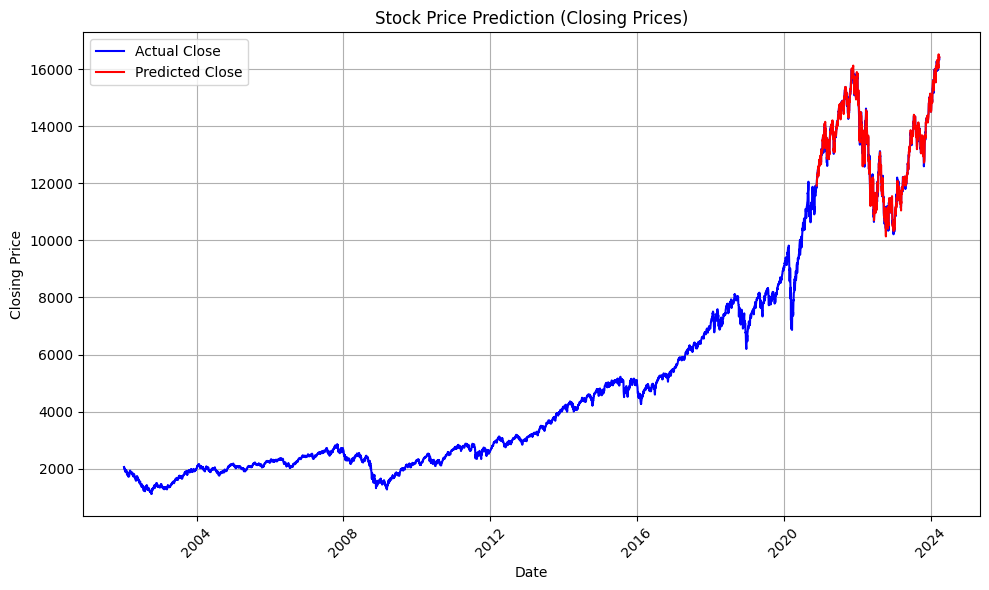

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(combined_df['Date'],combined_df['Close'] , label='Actual Close', color='blue')
plt.plot(test_set['Date'],test_set['Predicted_close'] , label='Predicted Close', color='red')

plt.title('Stock Price Prediction (Closing Prices)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [46]:
import lime
import lime.lime_tabular


# 1. Prepare Data
test_set_pi_raw = test_set[selected_features].copy()

# 2. Explainer Initialization
# For LIME
explainer_lime = lime.lime_tabular.LimeTabularExplainer(x_test_pi, mode='regression')

# LIME Explanation
idx_to_explain = 10  # Choose an index from the test set to explain
explanation_lime = explainer_lime.explain_instance(x_test_pi[idx_to_explain], best_svr_pi_test.predict)
explanation_lime.show_in_notebook()



ModuleNotFoundError: No module named 'lime'

In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=1c25887b21e4ce994652632e687c796c23e9d35d1ff364b78fa52f3b3bd01d9c
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
x_test[10]

array([-0.0053994 ,  0.00267521,  0.00497844,  0.01261822,  0.00913798,
        0.05882779,  0.0850932 ,  0.10340194,  0.07441793])

## Datasets to carry out the rest of the study (15-20 Datasets)

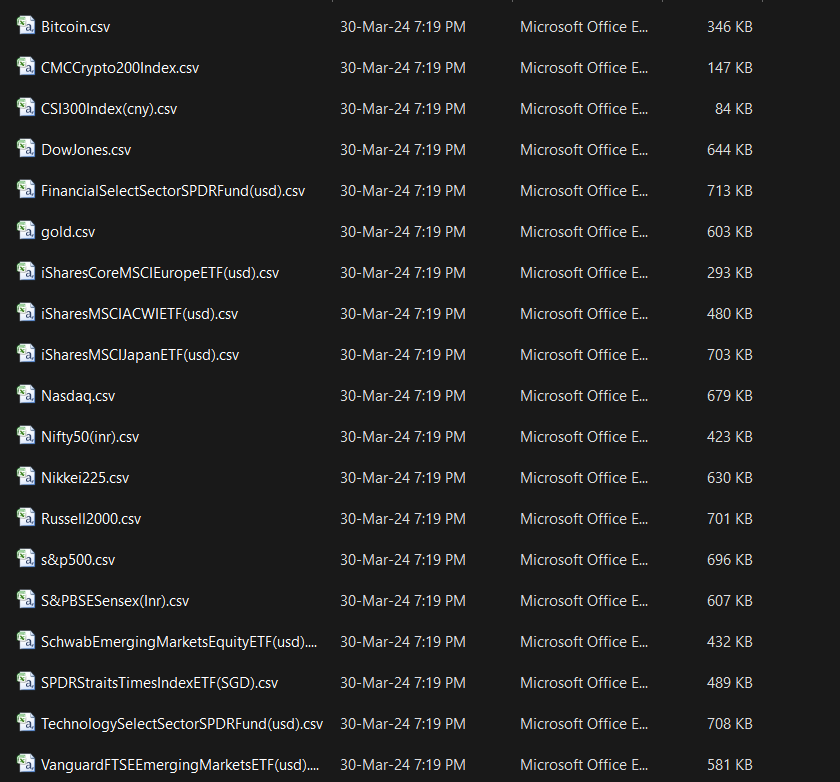

## Other Machine Learning models to experimentation   (4 Models)


*   Gradient Boosting Decision Tree
*   XGBoost
*   Random Forest





In [47]:
from sklearn.ensemble import GradientBoostingRegressor

# Define parameter grid for GridSearchCV
param_grid_gbdt = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}

# Create GBDT model
gbdt = GradientBoostingRegressor()

# Perform grid search with cross-validation
grid_search_gbdt = GridSearchCV(gbdt, param_grid_gbdt, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_gbdt.fit(x_train, y_train)

# Get the best model from grid search
best_gbdt = grid_search_gbdt.best_estimator_

# Print the best hyperparameters found from grid search
print("Best hyperparameters found for GBDT:")
print(grid_search_gbdt.best_params_)

# Make predictions
y_train_pred_gbdt = best_gbdt.predict(x_train)
y_valid_pred_gbdt = best_gbdt.predict(x_valid)
y_test_pred_gbdt = best_gbdt.predict(x_test)

# Evaluate the model
train_rmse_gbdt = np.sqrt(mean_squared_error(y_train, y_train_pred_gbdt))
valid_rmse_gbdt = np.sqrt(mean_squared_error(y_valid, y_valid_pred_gbdt))
test_rmse_gbdt = np.sqrt(mean_squared_error(y_test, y_test_pred_gbdt))

print("Train RMSE (GBDT):", train_rmse_gbdt)
print("Validation RMSE (GBDT):", valid_rmse_gbdt)
print("Test RMSE (GBDT):", test_rmse_gbdt)

# Plotting

# Visualization for GBDT predictions
# Use the same approach as you did for SVR to visualize GBDT predictions.


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters found for GBDT:
{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
Train RMSE (GBDT): 0.011058978582679369
Validation RMSE (GBDT): 0.01097712435779201
Test RMSE (GBDT): 0.011917932500691869


In [48]:
import xgboost as xgb

# Define parameter grid for GridSearchCV
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}

# Create XGBoost model
xgboost = xgb.XGBRegressor()

# Perform grid search with cross-validation
grid_search_xgb = GridSearchCV(xgboost, param_grid_xgb, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_xgb.fit(x_train, y_train)

# Get the best model from grid search
best_xgb = grid_search_xgb.best_estimator_

# Print the best hyperparameters found from grid search
print("Best hyperparameters found for XGBoost:")
print(grid_search_xgb.best_params_)

# Make predictions
y_train_pred_xgb = best_xgb.predict(x_train)
y_valid_pred_xgb = best_xgb.predict(x_valid)
y_test_pred_xgb = best_xgb.predict(x_test)

# Evaluate the model
train_rmse_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
valid_rmse_xgb = np.sqrt(mean_squared_error(y_valid, y_valid_pred_xgb))
test_rmse_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))

print("Train RMSE (XGBoost):", train_rmse_xgb)
print("Validation RMSE (XGBoost):", valid_rmse_xgb)
print("Test RMSE (XGBoost):", test_rmse_xgb)

# Plotting

# Visualization for XGBoost predictions
# Use the same approach as you did for SVR to visualize XGBoost predictions.


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters found for XGBoost:
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Train RMSE (XGBoost): 0.01127156219113386
Validation RMSE (XGBoost): 0.010911356327595668
Test RMSE (XGBoost): 0.011899930139068496


In [49]:
from sklearn.ensemble import RandomForestRegressor

# Define parameter grid for GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30]
}

# Create Random Forest model
random_forest = RandomForestRegressor()

# Perform grid search with cross-validation
grid_search_rf = GridSearchCV(random_forest, param_grid_rf, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_rf.fit(x_train, y_train)

# Get the best model from grid search
best_rf = grid_search_rf.best_estimator_

# Print the best hyperparameters found from grid search
print("Best hyperparameters found for Random Forest:")
print(grid_search_rf.best_params_)

# Make predictions
y_train_pred_rf = best_rf.predict(x_train)
y_valid_pred_rf = best_rf.predict(x_valid)
y_test_pred_rf = best_rf.predict(x_test)

# Evaluate the model
train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
valid_rmse_rf = np.sqrt(mean_squared_error(y_valid, y_valid_pred_rf))
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))

print("Train RMSE (Random Forest):", train_rmse_rf)
print("Validation RMSE (Random Forest):", valid_rmse_rf)
print("Test RMSE (Random Forest):", test_rmse_rf)

# Plotting

# Visualization for Random Forest predictions
# Use the same approach as you did for SVR to visualize Random Forest predictions.


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best hyperparameters found for Random Forest:
{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 150}
Train RMSE (Random Forest): 0.010135706259885672
Validation RMSE (Random Forest): 0.010966074787131904
Test RMSE (Random Forest): 0.011997838353076969
